# Kuharski recepti

Za projektno nalogo sem s strani [kulinarika.net](https://www.kulinarika.net) zbral prvih 1200 receptov po popularnosti.

Podatki so ločeni v štiri csv datoteke:
* recepti.csv
* kategorije.csv
* avtorji.csv
* povezave.csv

## Zbrani podatki
Recepti vsebujejo:
* id recepta
* naslov
* datum objave
* zahtevnost (1 = najlažje, 5 = najtežje)
* čas priprave
* količino hrane
* število mnenj
* število fotografij
* datum zadnje fotografije
* ali je jed bolj zdrava

Kategorije vsebujejo:
* id recepta
* kategorija
* podkategorija

Avtorji vsebujejo:
* id avtorja
* ime avtorja
* spol avtorja

Povezave vsebujejo:
* id recepta
* id avtorja

## Predvidena analiza
Analiziral bom kategorije (najpopularnejše, najbolj zastopane, najlažje, ...) ter recepte glede na spol avtorjev.
- - - - - 
Vstavimo podatke in iz datumov dodajmo še stolpce z **letom objave**, **mesecem objave** in **letom zadnje fotografije**, ker nam bodo ti podatki prišli prav.

In [3]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 12
%matplotlib inline

recepti = pd.read_csv('ReceptiCSV/recepti.csv', index_col='id', dayfirst=True, parse_dates=[2,9])
kategorije = pd.read_csv('ReceptiCSV/kategorije.csv')
avtorji = pd.read_csv('ReceptiCSV/avtorji.csv', index_col='id')
povezave = pd.read_csv('ReceptiCSV/povezave.csv')

recepti['letoobjave'] = pd.DatetimeIndex(recepti['objava']).year
recepti['mesecobjave'] = pd.DatetimeIndex(recepti['objava']).month
recepti['letofoto'] = pd.DatetimeIndex(recepti['zadnjafoto']).year

Videli bomo, da pri nekaterih receptih niso izpoljnena vsa polja. [Nekaterim celim številom so zato dodane decimalne vejice.](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#support-for-integer-na)
- - - 
Oglejmo si torej našo **glavno tabelo**.

In [6]:
recepti

,naslov,objava,letoobjave,zahtevnost,priprava,kolicina,stmnenj,stfoto,zadnjafoto,letofoto,zdravajed,mesecobjave
id,,,,,,,,,,,,
3603,Torta Nutella,2004-04-20,2004,3,75,NaN,1079.0,477.0,2016-09-06,2016.0,NaN,4
12619,Čokoladno - mascarponejeve kocke,2009-05-16,2009,2,45,NaN,513.0,91.0,2016-05-18,2016.0,NaN,5
8100,Skutino pecivo za požrešne sosede,2006-10-12,2006,1,NaN,NaN,299.0,59.0,2016-04-17,2016.0,NaN,10
5814,"Biskvit za torto, ki nikoli ne pade dol",2005-12-04,2005,2,45,NaN,339.0,246.0,2016-01-29,2016.0,NaN,12
4364,Super dobra jabolčna pita,2004-11-29,2004,1,90,NaN,171.0,62.0,2016-05-28,2016.0,NaN,11
9431,Moji mehki medenjaki,2006-12-22,2006,2,NaN,NaN,329.0,141.0,2015-12-28,2015.0,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...
12056,Lanina torta,2008-12-22,2008,2,180,NaN,45.0,26.0,2016-09-09,2016.0,NaN,12
342,Kokosove rezine,1999-10-30,1999,1,NaN,NaN,5.0,2.0,2011-08-08,2011.0,NaN,10


Za boljši občutek lahko pogledamo skupna povprečja vseh zbranih receptov za **leto objave**, **zahtevnost**, **število mnenj**, **število fotografij** in **leto zadnje objavljene fotografije**.

In [9]:
recepti.mean()[['letoobjave', 'zahtevnost', 'stmnenj', 'stfoto', 'letofoto']]

letoobjave    2006.413333
zahtevnost       1.900833
stmnenj         46.537114
stfoto          10.403361
letofoto      2012.900673
dtype: float64

Če pogledamo kako so recepti uvršeni po **kategorijah**, vidimo, da je daleč največ **sladic**. Kasneje bomo videli, da je kar 57% receptov **sladic**.

**Kategorije receptov**:

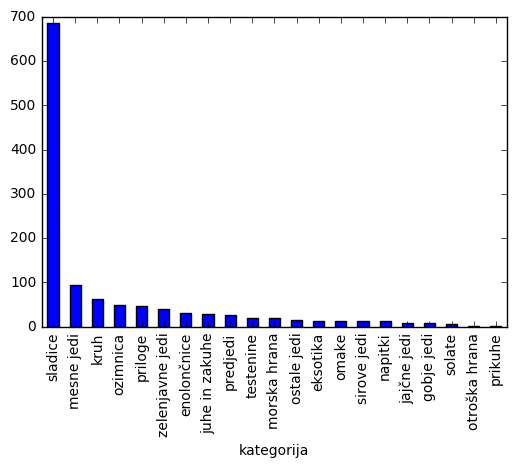

In [10]:
recepti_po_kategorijah = kategorije.groupby('kategorija')
st_kategorij = recepti_po_kategorijah.size().count()
graf_kategorij = recepti_po_kategorijah.size().sort_values(
    ascending=False).head(st_kategorij)
graf_kategorij.name = 'kategorije'
# Če želimo združiti kategorije od nekje dalje v 'Ostalo'
#graf['Ostalo'] = recepti_po_kategorijah.size().sort_values(ascending=False
#        ).tail(recepti_po_kategorijah.size().count() - graf_kategorij.count()
#              ).sum()
graf_kategorij.sort_values(ascending=False).plot(kind='bar')

**Podkategorije receptov**:

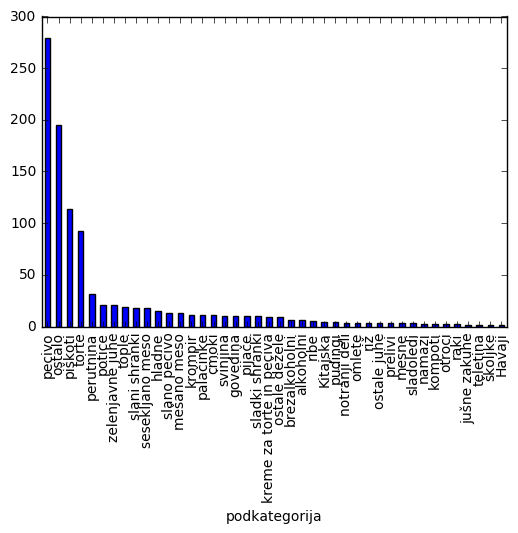

In [11]:
recepti_po_podkategorijah = kategorije.groupby('podkategorija')
st_podkategorij = recepti_po_podkategorijah.size().count()
graf_podkategorij = recepti_po_podkategorijah.size().sort_values(
    ascending=False).head(st_podkategorij)
graf_podkategorij.name = 'podkategorije'
# Če želimo združiti podkategorije od nekje dalje v 'Ostalo'
#graf_podkategorij['Ostalo'] = recepti_po_podkategorijah.size().sort_values(
#    ascending=False).tail(recepti_po_podkategorijah.size().count() - 
#                          graf_podkategorij.count()).sum()
graf_podkategorij.sort_values(ascending=False).plot(kind='bar')

**Povprečja števila mnenj, fotografij, zahtevnosti in standardni odklon za mnenja ter razmerje le tega z njihovo količino**:

In [12]:
kategorije_po_mnenjih = kategorije.join(recepti.stmnenj, on='recept').join(
recepti.stfoto, on='recept').join(recepti.zahtevnost, on='recept')
povprecno_stmnenj_kategorije = kategorije_po_mnenjih.groupby('kategorija'
).mean().sort_values('stmnenj', ascending = False)[['stmnenj', 'stfoto', 'zahtevnost']]
povprecno_stmnenj_kategorije['odklon mnenj'] = kategorije_po_mnenjih.groupby('kategorija'
).std()['stmnenj']
povprecno_stmnenj_kategorije['razmerje'] = povprecno_stmnenj_kategorije['odklon mnenj']/povprecno_stmnenj_kategorije['stmnenj']
povprecno_stmnenj_kategorije.head(10)

,stmnenj,stfoto,zahtevnost,odklon mnenj,razmerje
kategorija,,,,,
kruh,64.370968,15.524590,1.983871,63.382325,0.984641
sladice,53.883382,13.771137,2.014556,69.980526,1.298740
sirove jedi,48.538462,5.230769,1.769231,25.408710,0.523476
prikuhe,43.000000,2.000000,1.000000,NaN,NaN
ozimnica,41.645833,3.638298,1.770833,40.223043,0.965836
zelenjavne jedi,37.756098,5.780488,1.512195,40.388600,1.069724
ostale jedi,36.687500,5.125000,1.750000,29.499647,0.804079
napitki,35.000000,4.250000,1.250000,25.323363,0.723525
mesne jedi,34.789474,4.765957,2.010526,41.544361,1.194165


Iz zgornjih grafov lahko razberemo, da uporabniki objavljajo največ **sladic** (predvsem **peciva**, **piškote** in **torte**). Zanimivo pa je, da imajo recepti v **kategoriji** **kruh** v povprečju **največ mnenj** in **največ fotografij** (več kot **sladice**). Vprašamo se, če je to posledica tega, da je **sladic** daleč največ med vsemi recepti, a se **standardna odklona** **kruha** in **sladic** ne razlikujeta zelo močno. Tudi **sirove jedi** imajo presenetljivo visoko povprečje, glede na to, da spadajo med **kategorije** z manj recepti. Ker smo zajeli le en recept iz kategorije **prikuh**, njihovega povprečja ne moremo upoštevati.

Glede na **zahtevnost** spadajo recepti iz **kategorij** **sladice** in **mesne jedi** med težje in **napitki**, **zelenjavne jedi** in **predjedi** med lažje.
- - - 
Poglejmo grafa **spola avtorjev** in **delež receptov glede na posamezen spol**.

**Spol avtorjev**:

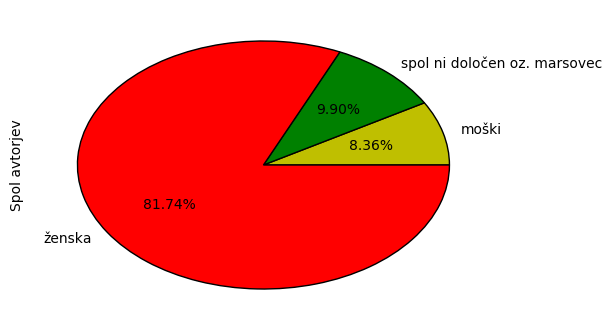

In [10]:
avtorji_po_spolih = avtorji.groupby('spol')
graf_avtorjev_po_spolih = avtorji_po_spolih.size()
graf_avtorjev_po_spolih.name = 'Spol avtorjev'
graf_avtorjev_po_spolih.plot(kind='pie', autopct = '%.2f%%', colors=['y', 'g', 'r'])

**Delež receptov glede na spol**:

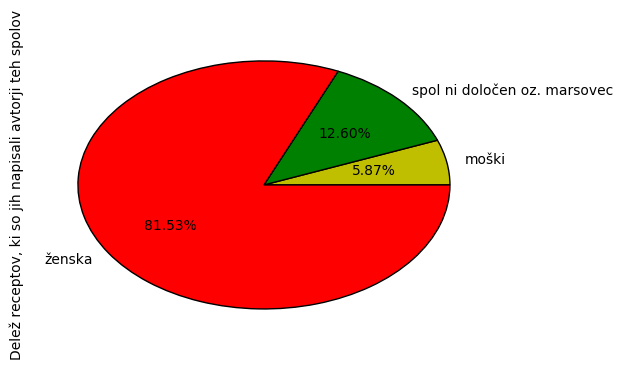

In [9]:
recepti_po_spolih = povezave.join(avtorji.spol, on='avtor')
graf_receptov_po_spolih = recepti_po_spolih.groupby('spol').size()
graf_receptov_po_spolih.name = 'Delež receptov, ki so jih napisali avtorji teh spolov'
graf_receptov_po_spolih.plot(kind='pie', autopct = '%.2f%%', colors=['y', 'g', 'r'])

In [9]:
recepti_po_spolih = povezave.join(avtorji.spol, on='avtor')
kategorije_po_spolih = pd.merge(recepti_po_spolih, kategorije).groupby(
    ['spol', 'kategorija']).size().unstack().T

za_zenske = kategorije_po_spolih.nlargest(3, 'ženska')['ženska']
za_moske = kategorije_po_spolih.nlargest(3, 'moški')['moški']
za_marsovce = kategorije_po_spolih.nlargest(3, 'spol ni določen oz. marsovec'
                                           )['spol ni določen oz. marsovec']
za_zenske = pd.DataFrame(za_zenske)
za_zenske['odstotek'] = za_zenske / graf_receptov_po_spolih['ženska']
za_zenske.rename(columns={'ženska':'število'}, inplace=True)
za_zenske = za_zenske.sort_values(by = 'število', ascending = False, na_position = 'first')

za_moske = pd.DataFrame(za_moske)
za_moske['odstotek'] = za_moske / graf_receptov_po_spolih['moški']
za_moske.rename(columns={'moški':'število'}, inplace=True)
za_moske = za_moske.sort_values(by = 'število', ascending = False, na_position = 'first')

za_marsovce = pd.DataFrame(za_marsovce)
za_marsovce['odstotek'] = za_marsovce / graf_receptov_po_spolih['spol ni določen oz. marsovec']
za_marsovce.rename(columns={'spol ni določen oz. marsovec':'število'}, inplace=True)
za_marsovce = za_marsovce.sort_values(by = 'število', ascending = False, na_position = 'first')

**Prve tri kategorije glede na število receptov za ženske in odstotek le-teh od vseh receptov z žensko avtorico**

In [10]:
za_zenske

,število,odstotek
kategorija,,
sladice,580.0,0.605428
mesne jedi,66.0,0.068894
kruh,48.0,0.050104


**Prve tri kategorije glede na število receptov za moške in odstotek le-teh od vseh receptov z moškim avtorjem**

In [11]:
za_moske

,število,odstotek
kategorija,,
sladice,15.0,0.217391
mesne jedi,12.0,0.173913
kruh,8.0,0.115942


**Prve tri kategorije glede na število receptov za nedoločen spol in odstotek le-teh od vseh receptov z avtorjem nedoločenega spola**

In [12]:
za_marsovce

,število,odstotek
kategorija,,
sladice,76.0,0.513514
mesne jedi,17.0,0.114865
priloge,8.0,0.054054


Prvi graf zgoraj prikazuje, koliko odstotkov avtorjev je katerega **spola** (prevladujejo **ženske**). Drugi graf prikazuje, koliko odstotkov receptov so napisali predstavniki kakega **spola** (glede na prejšnji graf se razlikuje predvsem pri **nedoločenem spolu** in pri **moških**). Iz tega sledi, da **ženske avtorice** v povprečju napišejo več receptov kot **moški avtorji**. Zgoraj pa vidimo, za katere kategorije posamezni **spoli** napišejo največ receptov. Pri vseh sta prvi dve **kategoriji** **sladice** in **mesne jedi**, razlikujejo pa se pri tretji - pri **moških** in **ženskah** je to **kruh**, pri **nedoločenem spolu** pa **priloge**. Odstotek nam pove, kolikšen delež receptov, ki jih je napisal tisti **spol**, predstavlja ta **kategorija**. Pri **ženskah** in **nedoločenem spolu** **sladice** predstavljajo večino njihovih receptov, pri **moških** pa so **kategorije** bolj enakomerno razporejene.
- - - 
Zanima nas tudi, ali imajo starejši recepti več **mnenj** kot novi, zato si bomo ogledali naslednji graf.

**Graf mnenj glede na datum objave recepta**

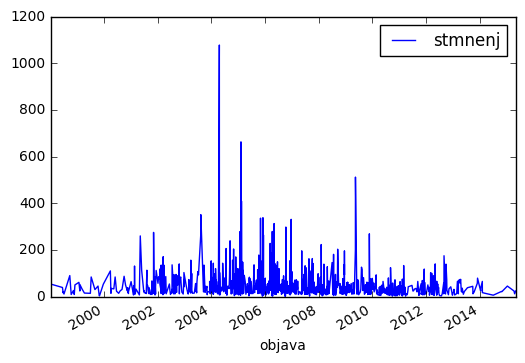

In [13]:
recepti.plot(x = 'objava', y = 'stmnenj')

Vidimo, da recepti z največ **mnenji** niso niti najnovejši niti najstarejši med recepti. Te podatke lahko razložimo preprosto tako, da spletna stran na začetku še ni bila zelo obiskana in ni imela veliko uporabnikov, novejši recepti pa na strani še niso dovolj dolgo, da bi pridobili veliko **število mnenj**.
- - - 
Nekaj receptov ima podatek, da spadajo med **bolj zdrave jedi** - primerjajmo jih z ostalimi.

**Povprečna zahtevnost, število mnenj in število fotografij za bolj zdrave jedi in ostale jedi**

In [14]:
zdrave_jedi = recepti[recepti.zdravajed == 'Bolj zdrava jed']
zdrave = zdrave_jedi[['zahtevnost', 'stmnenj', 'stfoto']].mean()
zdrave = pd.DataFrame(zdrave)
zdrave.rename(columns={0:'zdrave'}, inplace=True)
ostale_jedi = recepti[recepti.zdravajed != 'Bolj zdrava jed']
ostale = ostale_jedi[['zahtevnost', 'stmnenj', 'stfoto']].mean()
ostale = pd.DataFrame(ostale)
ostale.rename(columns={0:'ostale'}, inplace=True)
pd.concat([ostale.T, zdrave.T])

,zahtevnost,stmnenj,stfoto
ostale,1.907861,46.664975,10.454390
zdrave,1.411765,37.647059,6.882353


V povprečju so torej **bolj zdrave jedi** med manj ogledanimi in pripravljenimi, čeprav je povprečna **zahtevnost** nižja od povprečne **zahtevnosti** ostalih jedi. Jesti zdravo torej ni tako zahtevno.
- - - 
Pri podatkih o **času priprave**, se nahaja podatek 4+ ur, ki ga pri računanju povprečja ne moremo uporabiti.

**Število receptov z določenim časom priprave (v minutah)**

In [6]:
recepti_po_casu = recepti.groupby('priprava')
recepti_po_casu.size().sort_values()

priprava
150        4
5          8
240       10
4+ ur     28
15        31
180       41
75        61
90        90
30        91
120       94
45       118
60       142
dtype: int64

Glede na zgornje podatke vidimo, da ima največ receptov **čas priprave** 60 minut, sledijo pa jim recepti s **časom priprave** 45 minut.
- - -
Graf spodaj pa prikazuje število receptov za posamezno **zahtevnost** (1 = najlažje, 5 = najtežje). Receptov **težavnosti** 4. ali 5. stopnje ni veliko.

**Število receptov za vsako težavnost**

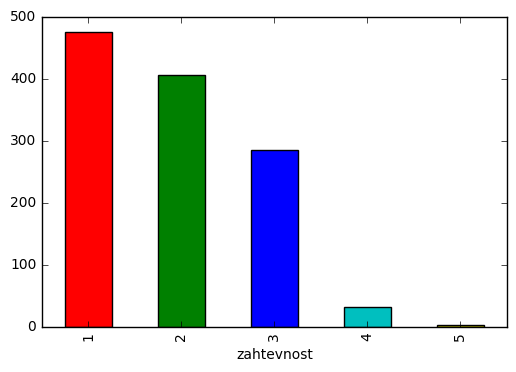

In [16]:
recepti_po_tezavnosti = recepti.groupby('zahtevnost')
recepti_po_tezavnosti.size().plot(kind = 'bar', color=['r', 'g', 'b', 'c', 'y'])

Ali so recepti, ki jih pripravljamo dlje tudi težji? Spodnji graf prikazuje povprečno **težavnost** za posamezen **čas priprave**. Hitreje pripravljeni recepti imajo res nižje povprečno **težavnost** od receptov z dolgim **časom priprave**

**Povprečna zahtevnost za vsak čas priprave**

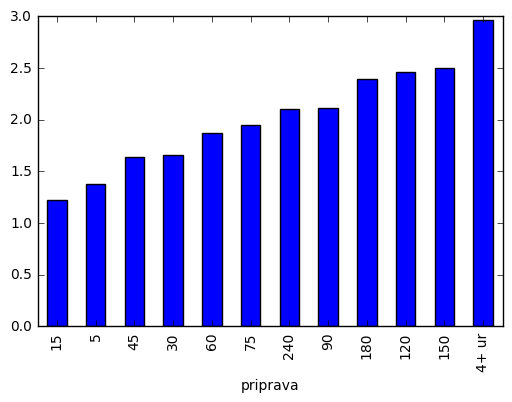

In [8]:
cas_in_zahtevnost = recepti_po_casu.mean()['zahtevnost']
cas_in_zahtevnost.sort_values().plot(kind = 'bar')

Če pa odvzamemo podatek o **času priprave** 4+ ur, lahko izračunamo povprečen **čas priprave** (v minutah) za posamezno **težavnost**. To je prikazano v grafu spodaj. Povprečen **čas priprave** res narašča glede na **zahtevnost**, pri **težavnosti** 5. stopnje pa je nepričakovano kratek.

**Povprečen čas priprave za vsako zahtevnost**

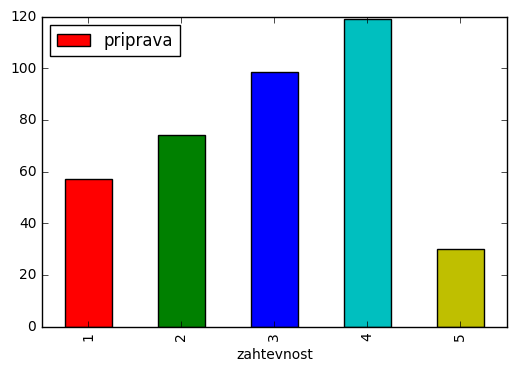

In [18]:
uporabni_casi = recepti[recepti.priprava != '4+ ur']
priprava = pd.DataFrame(pd.to_numeric(uporabni_casi['priprava']))
zahtevnost = pd.DataFrame(uporabni_casi['zahtevnost'])
zahtevnost_in_cas = pd.concat([zahtevnost, priprava], axis=1, join='inner')
zahtevnost_in_cas.groupby('zahtevnost').mean().plot(kind = 'bar', color=['r', 'g', 'b', 'c', 'y'])

Da razložimo pojav pri 5. **težavnostni** stopnji si lahko pogledamo število receptov za posamezno **zahtevnost**. Ostal nam je le en recept **težavnosti** 5. stopnje, zato zgornji povprečen **čas priprave** ne prikazuje realne slike (ni dejansko povprečje). Preostale recepte 5. **težavnosti** smo očitno odstranili, ko smo odstranili recepte s **časom priprave** 4+ ur (torej imajo recepti te **težavnosti** res dolg **čas priprave**, ki pa ga nismo mogli izračunati).

**Število receptov za vsako zahtevnost (brez receptov s časom priprave 4+ ur)**

In [19]:
zahtevnost_in_cas[pd.notnull(zahtevnost_in_cas.priprava)].groupby('zahtevnost').count()

,priprava
zahtevnost,
1,228
2,307
3,135
4,19
5,1


Spodaj vidimo, da se podatek o **količini hrane**, ki jo z receptom pripravimo, razlikuje od recepta do recepta in z njim težko karkoli izračunamo. Največ receptov pa ima **količine** za 2 ali 4 osebe.

**Število receptov z določeno količino pripravljene hrane**

In [20]:
recepti_po_kolicinah = recepti.groupby('kolicina')
recepti_po_kolicinah.size().sort_values()

kolicina
                        1
en klasičen pekač       1
dva rebrasta modela     1
dva pekača              1
do 30 piškotov          1
cirka 20 komadov        1
                       ..
2 osebi                10
za 2 osebi             15
4                      15
12 kosov               18
za 4 osebe             31
4 osebe                36
dtype: int64

Kako pa je z razporeditvijo receptov skozi **mesece**? Vzemimo za primer **sladice**:

**Graf števila receptov v kategoriji sladice za posamezen mesec**

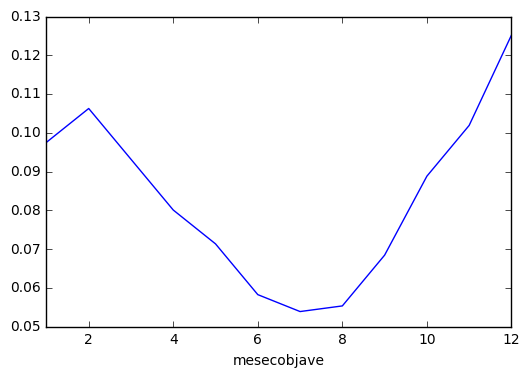

In [21]:
kategorije_meseci = kategorije.join(recepti.mesecobjave, on='recept'). join(recepti.objava, on='recept')
sladice_mesec = kategorije_meseci[kategorije_meseci['kategorija'] == 'sladice']
stevilo_sladic = sladice_mesec.groupby('mesecobjave').size()
stevilo_sladic = pd.DataFrame(stevilo_sladic)
stevilo_sladic['delež'] = stevilo_sladic / recepti_po_kategorijah.size()['sladice']
stevilo_sladic = stevilo_sladic.rename(columns = {0:'število'})
stevilo_sladic['delež'].plot()

Vidimo, da je delež **sladic** objavljenih v **zimskem obdobju** občutno večji kot delež **sladic** objavljenih med **poletjem**.
- - -
Ker je **sladic** tako veliko, si lahko še ogledamo, kdo objavlja največ **sladic** in kakšnega **spola** so njihovi avtorji:

**Graf deležev spolov avtorjev receptov v kategoriji sladice**

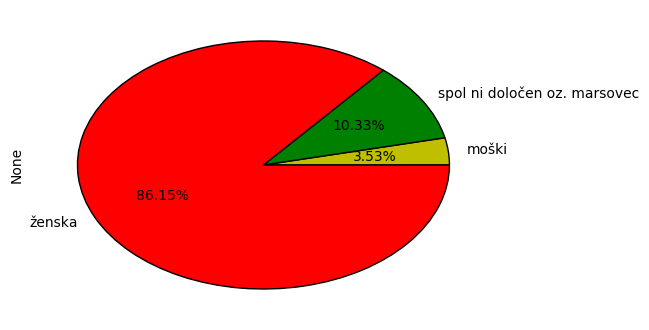

In [31]:
kategorije_avtorji = pd.merge(povezave, kategorije)
kategorije_avtorji = kategorije_avtorji[(kategorije_avtorji['kategorija'] == 'sladice')].groupby(
    'avtor').size().sort_values(ascending = False)
kategorije_avtorji = pd.DataFrame(kategorije_avtorji)
kategorije_avtorji = kategorije_avtorji.rename(columns = {0:'število'})
kategorije_avtorji = kategorije_avtorji.join(avtorji)
kategorije_avtorji.groupby('spol').size().plot(kind = 'pie', autopct = '%.2f%%', colors=['y', 'g', 'r'])

**Delež avtorjev določenega spola, ki je napisalo recept v kategoriji sladice**

In [33]:
delez_receptov_spola = pd.DataFrame(kategorije_avtorji.groupby('spol').size())
delez_receptov_spola = delez_receptov_spola.rename(columns = {0:'število'})
delez_receptov_spola = delez_receptov_spola.join(graf_avtorjev_po_spolih)
delez_receptov_spola['delež'] = delez_receptov_spola['število'] / delez_receptov_spola['Spol avtorjev']
delez_receptov_spola['delež']

spol
moški                           0.285714
spol ni določen oz. marsovec    0.706897
ženska                          0.713987
Name: delež, dtype: float64

**Prvih 10 avtorjev v kategoriji sladice**

In [24]:
kategorije_avtorji.head(10)

,število,avtor,spol
avtor,,,
jade,18,jade,ženska
marinka,14,Marinka,ženska
mamamia,13,mamamia,ženska
riko,13,Riko,spol ni določen oz. marsovec
bannanna,12,bannanna,ženska
vanja_v_zda,11,Vanja_v_ZDA,ženska
majdi,10,majdi,ženska
tiuba,9,TIUBA,ženska
marta,9,marta,ženska


Veliko večino receptov v kategoriji **sladice** torej napišejo **ženske**. Srednja tabela pa nam pokaže, da približno 70% **žensk** in avtorjev **nedoločenega spola** objavlja **sladice**, medtem ko le okoli 30% **moških** objavlja recepte te **kategorije**.

Pri eni od prejšnjih tabel smo računali deleže za posamezne **spole** (za njihove prve tri **kategorije**) glede na recepte (kjer so za več receptov lahko enaki avtorji, tj. enak **spol**), tu pa računamo deleže glede na avtorje (torej se ti ne ponavljajo).
- - -
Kako pa je pri ostalih bolj popularnih **kategorijah**? Poglejmo si še recepte v **kategoriji** **kruh**.

**Graf deležev spolov avtorjev receptov v kategoriji kruh**

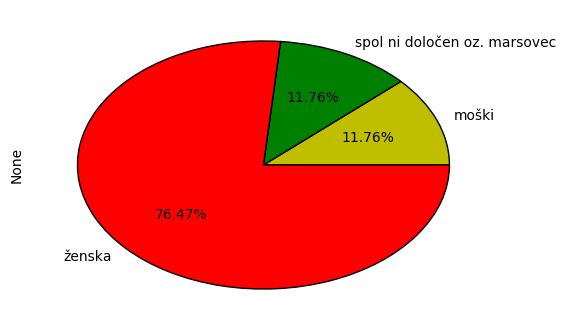

In [25]:
kategorije_avtorji_kruh = pd.merge(povezave, kategorije)
kategorije_avtorji_kruh = kategorije_avtorji_kruh[(kategorije_avtorji_kruh['kategorija'] == 'kruh')].groupby(
    'avtor').size().sort_values(ascending = False)
kategorije_avtorji_kruh = pd.DataFrame(kategorije_avtorji_kruh)
kategorije_avtorji_kruh = kategorije_avtorji_kruh.rename(columns = {0:'število'})
kategorije_avtorji_kruh = kategorije_avtorji_kruh.join(avtorji)
kategorije_avtorji_kruh.groupby('spol').size().plot(kind = 'pie', autopct = '%.2f%%', colors=['y', 'g', 'r'])

**Delež avtorjev določenega spola, ki je napisalo recept v kategoriji kruh**

In [26]:
delez_receptov_spola_kruh = pd.DataFrame(kategorije_avtorji_kruh.groupby('spol').size())
delez_receptov_spola_kruh = delez_receptov_spola_kruh.rename(columns = {0:'število'})
delez_receptov_spola_kruh = delez_receptov_spola_kruh.join(graf_avtorjev_po_spolih)
delez_receptov_spola_kruh['delež'] = delez_receptov_spola_kruh['število'] / delez_receptov_spola_kruh['Spol avtorjev']
delez_receptov_spola_kruh['delež']

spol
moški                           0.122449
spol ni določen oz. marsovec    0.103448
ženska                          0.081420
Name: delež, dtype: float64

Zgornji podatki nam pokažejo, da sicer **ženske** napišejo večino receptov tudi v tej **kategoriji** (**ženskih** avtoric je namreč dosti več kot avtorjev ostalih **spolov**), ampak je delež **ženskih** avtoric, ki pišejo recepte v tej **kategoriji** le 8%. Medtem pa 12% **moških** avtorjev piše za to **kategorijo**.
- - -
Kako je pri **mesnih jedeh**?

**Graf deležev spolov avtorjev receptov v kategoriji mesne jedi**

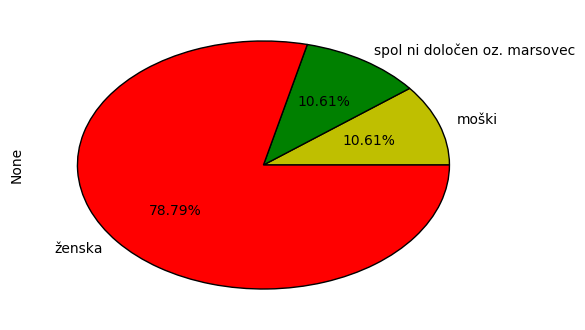

In [27]:
kategorije_avtorji_meso = pd.merge(povezave, kategorije)
kategorije_avtorji_meso = kategorije_avtorji_meso[(kategorije_avtorji_meso['kategorija'] == 'mesne jedi')].groupby(
    'avtor').size().sort_values(ascending = False)
kategorije_avtorji_meso = pd.DataFrame(kategorije_avtorji_meso)
kategorije_avtorji_meso = kategorije_avtorji_meso.rename(columns = {0:'število'})
kategorije_avtorji_meso = kategorije_avtorji_meso.join(avtorji)
kategorije_avtorji_meso.groupby('spol').size().plot(kind = 'pie', autopct = '%.2f%%', colors=['y', 'g', 'r'])

**Delež avtorjev določenega spola, ki je napisalo recept v kategoriji mesne jedi**

In [28]:
delez_receptov_spola_meso = pd.DataFrame(kategorije_avtorji_meso.groupby('spol').size())
delez_receptov_spola_meso = delez_receptov_spola_meso.rename(columns = {0:'število'})
delez_receptov_spola_meso = delez_receptov_spola_meso.join(graf_avtorjev_po_spolih)
delez_receptov_spola_meso['delež'] = delez_receptov_spola_meso['število'] / delez_receptov_spola_meso['Spol avtorjev']
delez_receptov_spola_meso['delež']

spol
moški                           0.142857
spol ni določen oz. marsovec    0.120690
ženska                          0.108559
Name: delež, dtype: float64

Pri **mesnih jedeh** je podobno kot pri kruhu večina receptov napisana s strani **ženskih** avtoric, a je odstotek **moških** avtorjev, ki pišejo za to **kategorijo** višji kot odstotek **ženskih** avtoric.
- - -
Zadnja **kategorija**, ki jo bomo tako obravnavali so **zelenjavne jedi**:

**Graf deležev spolov avtorjev receptov v kategoriji zelenjavne jedi**

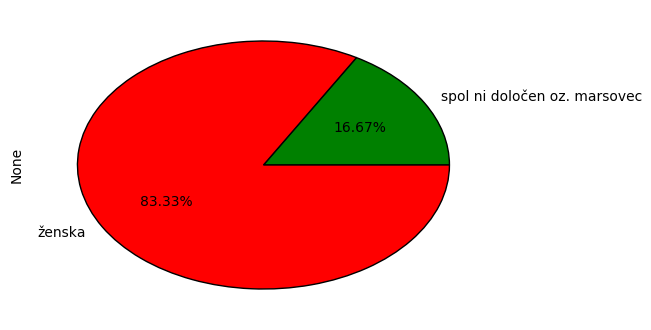

In [29]:
kategorije_avtorji_zelenjava = pd.merge(povezave, kategorije)
kategorije_avtorji_zelenjava = kategorije_avtorji_zelenjava[(kategorije_avtorji_zelenjava['kategorija']
    == 'zelenjavne jedi')].groupby('avtor').size().sort_values(ascending = False)
kategorije_avtorji_zelenjava = pd.DataFrame(kategorije_avtorji_zelenjava)
kategorije_avtorji_zelenjava = kategorije_avtorji_zelenjava.rename(columns = {0:'število'})
kategorije_avtorji_zelenjava = kategorije_avtorji_zelenjava.join(avtorji)
kategorije_avtorji_zelenjava.groupby('spol').size().plot(kind = 'pie', autopct = '%.2f%%', colors=['g', 'r'])

**Delež avtorjev določenega spola, ki je napisalo recept v kategoriji zelenjavne jedi**

In [30]:
delez_receptov_spola_zelenjava = pd.DataFrame(kategorije_avtorji_zelenjava.groupby('spol').size())
delez_receptov_spola_zelenjava = delez_receptov_spola_zelenjava.rename(columns = {0:'število'})
delez_receptov_spola_zelenjava = delez_receptov_spola_zelenjava.join(graf_avtorjev_po_spolih)
delez_receptov_spola_zelenjava['delež'] = delez_receptov_spola_zelenjava['število'] / delez_receptov_spola_zelenjava['Spol avtorjev']
delez_receptov_spola_zelenjava['delež']

spol
spol ni določen oz. marsovec    0.103448
ženska                          0.062630
Name: delež, dtype: float64

Preseneti nas morda podatek, da med zbranimi recepti v kategoriji **zelenjavnih jedi** ni noben recept napisan s strani **moških** avtorjev. Odstotek receptov napisanih s strani **nedoločenega spola** pa je tudi višji kot pri prejšnjih **kategorijah**.
- - -
### Lahko pripredimo fukcije dr. Pretnarja in poskusimo iz naslova recepta določiti njegovo kategorijo:

In [31]:
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if not beseda:
        return '$'
    konec = len(beseda) - 1
    if beseda[konec] in 'ds':
        konec -= 1
    while konec >= 0 and beseda[konec] in 'aeiou':
        konec -= 1
    return beseda[:konec + 1]

def koreni_besed(niz):
    return pd.Series(list({
        koren_besede(beseda) for beseda in niz.replace('-', ' ').lower().split() if beseda
    }))

def koreni_receptov(nizi):
    return nizi[nizi.notnull()].apply(
        koreni_besed
    ).stack().reset_index(level=1, drop=True)

def verjetnosti_po_kategorijah(dogodki_po_receptih):
    dogodki_po_receptih.name = 'dogodek'
    dogodki_po_kategorijah = kategorije.join(pd.DataFrame(dogodki_po_receptih), on='recept')
    pogostost_dogodkov = pd.crosstab(dogodki_po_kategorijah.dogodek, dogodki_po_kategorijah.kategorija)
    pogostost_dogodkov += (10**(-5))
    return pogostost_dogodkov / pogostost_dogodkov.sum()

In [32]:
verjetnost_kategorije = kategorije.groupby('kategorija').size() / len(recepti)
verjetnost_korena_naslova_pri_kategoriji = verjetnosti_po_kategorijah(koreni_receptov(recepti.naslov))

**Verjetnost posamezne kategorije**

In [33]:
verjetnost_kategorije.sort_values()

kategorija
prikuhe            0.000833
otroška hrana      0.001667
solate             0.005833
gobje jedi         0.006667
jajčne jedi        0.007500
napitki            0.010000
                     ...   
zelenjavne jedi    0.034167
priloge            0.039167
ozimnica           0.040000
kruh               0.051667
mesne jedi         0.079167
sladice            0.572500
dtype: float64

**Verjetnost posameznega korena besed v kategoriji sladice**

In [34]:
verjetnost_korena_naslova_pri_kategoriji.sladice.sort_values(ascending=False).head(10)

dogodek
tort        0.046632
z           0.033679
peciv       0.031606
čokoladn    0.031606
rezin       0.021243
            0.018653
pit         0.018653
piškot      0.016580
kokosov     0.016062
in          0.012435
Name: sladice, dtype: float64

**Verjetnost posameznega korena besed v kategoriji mesne jedi**

In [35]:
verjetnost_korena_naslova_pri_kategoriji['mesne jedi'].sort_values(ascending=False).head(10)

dogodek
v           0.083084
omak        0.074182
zrezk       0.041542
piščančj    0.035607
mesn        0.032640
govej       0.023738
z           0.023738
puranj      0.020771
piščanec    0.017804
            0.017804
Name: mesne jedi, dtype: float64

In [37]:
def doloci_kategorijo_iz_naslova(naslov=''):
    # Lahko bi se odločili, da ne bi upoštevali verjetnosti
    # posameznih kategorij, ker so razmerja med njimi zelo velika
    faktorji_kategorij = 1 * verjetnost_kategorije
    faktorji_kategorij *= verjetnost_korena_naslova_pri_kategoriji[
            verjetnost_korena_naslova_pri_kategoriji.index.isin(
                koreni_besed(naslov)
            )
        ].prod()
    faktorji_kategorij /= max(faktorji_kategorij)
    return faktorji_kategorij.sort_values(ascending=False).head(5)

In [38]:
doloci_kategorijo_iz_naslova(naslov='Sladka torta')

kategorija
sladice     1.000000e+00
prikuhe     2.216768e-05
eksotika    1.519827e-06
predjedi    1.096359e-06
priloge     5.944160e-07
dtype: float64

In [39]:
doloci_kategorijo_iz_naslova(naslov='Ljubljanski golaž')

kategorija
enolončnice    1.000000
mesne jedi     0.377582
ostale jedi    0.109323
omake          0.000001
solate         0.000001
dtype: float64

In [40]:
doloci_kategorijo_iz_naslova(naslov='Pohan sir na rukoli')

kategorija
sirove jedi    1.000000
gobje jedi     0.000015
ostale jedi    0.000010
kruh           0.000009
enolončnice    0.000008
dtype: float64

In [41]:
doloci_kategorijo_iz_naslova(naslov='Zdrav kruh z manj soli')

kategorija
kruh           1.000000e+00
sladice        7.415479e-04
mesne jedi     6.787641e-08
jajčne jedi    6.738030e-10
gobje jedi     4.492023e-10
dtype: float64

In [42]:
doloci_kategorijo_iz_naslova(naslov='Puranji zrezek s pire krompirjem')

kategorija
mesne jedi         1.000000e+00
zelenjavne jedi    3.750047e-05
morska hrana       1.527125e-05
juhe in zakuhe     9.174813e-06
otroška hrana      4.419480e-09
dtype: float64

Vidimo, da program pri nekaterih primerih dobro določi kategorijo, pri kakih tudi ne. Problem je v relativno majhni bazi podatkov (le 1200 naslovov receptov) in načinu jemenja korenov besed (deluje bolje v angleškem jeziku).